In [1]:
import pandas as pd
import numpy as np
import zipfile as zpf
import os
import csv
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import multivariate_normal
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import euclidean, mahalanobis
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial.distance import mahalanobis
from sklearn.covariance import empirical_covariance
from sklearn import metrics

**Part A**

In [38]:
#!gdown 14tBBbg5ix6PMqx4dGHxSYN1gCe3pEY03
           # extract all files to a directory named "data"
data_dir=r"data"
with zpf.ZipFile(r"Data.zip", "r") as zip_ref:
    zip_ref.extractall(data_dir)

In [2]:
for file_name in os.listdir(data_dir):
    if file_name.endswith(".txt"): 
        # replace ".txt" with ".csv" in the file name
        new_file_name = os.path.splitext(file_name)[0] + ".csv"
        data = pd.read_csv(os.path.join(data_dir, file_name), delimiter="\t")
        data.to_csv(os.path.join(data_dir, new_file_name), index=False)

    elif file_name.endswith(".csv"):
        data = pd.read_csv(os.path.join(data_dir, file_name))
        new_file_name = os.path.splitext(file_name)[0] + '_processed.csv'
        data = data.iloc[:, 1:]
        data.to_csv(os.path.join(data_dir, new_file_name), index=False)

NameError: name 'data_dir' is not defined

**Part B**

In [4]:
damadic = pd.read_csv('data/17112001_processed.csv')
class1f16_idx = np.concatenate([np.arange(56670,56770), np.arange(57475,57530), np.arange(57675,57800)])
class2f17_idx = np.concatenate([np.arange(53780,53794), np.arange(54193,54215)])
class3f18_idx = np.arange(54600,54700)
class4f19_idx = np.concatenate([np.arange(55482,55517), np.arange(55977,56015), np.arange(57030,57072), np.arange(58150,58325)])
class5n_idx = np.setdiff1d(np.arange(damadic.shape[0]), np.concatenate([class1f16_idx, class2f17_idx, class3f18_idx, class4f19_idx]))
y = np.zeros(damadic.shape[0])
y[class1f16_idx] = 1
y[class2f17_idx] = 2
y[class3f18_idx] = 3
y[class4f19_idx] = 4
y[class5n_idx] = 5

define the gaussian kernel function and use a function which is a kernel density estimator at a given point for f16,f17.f19 and normal data

In [3]:
f16=damadic.values[class1f16_idx]
cov_f16=np.cov(f16)
var_f16=np.var(f16)
mean_f16=np.mean(f16)

bandwidth = 0.2

# define the gaussian kernel function 
kernel = lambda x: np.exp(-0.5 * x ** 2)

# define a function to evaluate the kernel density estimator at a given point
def kde(x, data):
    return np.sum(kernel((x - data) / bandwidth), axis=1) / (data.shape[0] * bandwidth)

x = np.linspace(-1, 87, 1000)

# evaluate the PDF at each point in x
pdf_f16 = np.zeros_like(x)
for i, xi in enumerate(x):
    pdf_f16[i] = np.mean(kde(xi, f16))
    
print('Mean= '+str(mean_f16)+'\t var= '+str(var_f16)+'\n cov= '+str(cov_f16))

Mean= 402.37768973214287	 var= 672410.0809989038
 cov= [[705739.53966734 709002.51659274 708041.96905242 ... 694338.22159274
  690157.16416331 685312.46710685]
 [709002.51659274 712287.21673387 711320.84133064 ... 697532.84899194
  693324.7952621  688448.89372984]
 [708041.96905242 711320.84133064 710362.51350806 ... 696498.23455645
  692292.75102823 687419.43643145]
 ...
 [694338.22159274 697532.84899194 696498.23455645 ... 685295.98060484
  681308.70832661 676689.53969758]
 [690157.16416331 693324.7952621  692292.75102823 ... 681308.70832661
  677363.87184476 672794.14583669]
 [685312.46710685 688448.89372984 687419.43643145 ... 676689.53969758
  672794.14583669 668284.70289315]]


In [4]:
f17=damadic.values[class2f17_idx]
cov_f17=np.cov(f17)
var_f17=np.var(f17)
mean_f17=np.mean(f17)

# evaluate the PDF at each point in x
pdf_f17 = np.zeros_like(x)
for i, xi in enumerate(x):
    pdf_f17[i] = np.mean(kde(xi, f17))

print('Mean= '+str(mean_f17)+'\t var= '+str(var_f17)+'\n cov= '+str(cov_f17))

Mean= 388.3287326388889	 var= 689356.2154851994
 cov= [[721108.3769254  722587.06190524 721549.06666331 ... 716929.15790323
  716901.82977823 711639.72714718]
 [722587.06190524 724309.25394153 723367.08757056 ... 719125.90919355
  719085.91997984 713140.36934476]
 [721549.06666331 723367.08757056 722487.22571573 ... 718433.90112903
  718386.89949597 712177.70232863]
 ...
 [716929.15790323 719125.90919355 718433.90112903 ... 715132.69612903
  715061.87193548 707777.46145161]
 [716901.82977823 719085.91997984 718386.89949597 ... 715061.87193548
  714993.29447581 707752.07143145]
 [711639.72714718 713140.36934476 712177.70232863 ... 707777.46145161
  707752.07143145 702511.29507056]]


In [5]:
f18=damadic.values[class3f18_idx]
cov_f18=np.cov(f18)
var_f18=np.var(f18)
mean_f18=np.mean(f18)
mu3, std3 = norm.fit(f18.flatten())

x = np.linspace(-np.max(f18), np.max(f18), 1000)

# evaluate the PDF at each point in x
pdf_f18 = norm.pdf(x, mu3, std3)

print('Mean= '+str(mean_f18)+'\t var= '+str(var_f18)+'\n cov= '+str(cov_f18))

Mean= 404.2223125	 var= 679770.4907959023
 cov= [[704485.49641129 702938.54342742 703462.54461694 ... 698041.67979839
  701655.36673387 703104.56977823]
 [702938.54342742 701406.70770161 701940.64465726 ... 696572.10649194
  700173.18987903 701574.32304435]
 [703462.54461694 701940.64465726 702493.53773185 ... 697169.73647177
  700772.33574597 702111.07111895]
 ...
 [698041.67979839 696572.10649194 697169.73647177 ... 692248.49028226
  695827.3446371  696983.35131048]
 [701655.36673387 700173.18987903 700772.33574597 ... 695827.3446371
  699433.21447581 700608.87993952]
 [703104.56977823 701574.32304435 702111.07111895 ... 696983.35131048
  700608.87993952 702037.40386089]]


In [8]:
nor=damadic.values[class5n_idx]

#cov_n=np.cov(nor)
var_n=np.var(nor)
mean_n=np.mean(nor)


# evaluate the PDF at each point in x
pdf = np.zeros_like(x)
for i, xi in enumerate(x):
    pdf[i] = np.mean(kde(xi, nor))


In [6]:
f19=damadic.values[class4f19_idx]
cov_f19=np.cov(f19)
var_f19=np.var(f19)
mean_f19=np.mean(f19)

# evaluate the PDF at each point in x
pdf_f19 = np.zeros_like(x)
for i, xi in enumerate(x):
    pdf_f19[i] = np.mean(kde(xi, f19))

print('Mean= '+str(mean_f19)+'\t var= '+str(var_f19)+'\n cov= '+str(cov_f19))

Mean= 404.0447844827586	 var= 673386.1460977984
 cov= [[707266.80931452 708159.84810484 710726.52691532 ... 716436.69058468
  708227.14677419 711006.7415121 ]
 [708159.84810484 709064.39060484 711630.42905242 ... 717351.60731855
  709092.27806452 711894.43381048]
 [710726.52691532 711630.42905242 714239.49523185 ... 719979.28400202
  711782.60016129 714550.92785282]
 ...
 [716436.69058468 717351.60731855 719979.28400202 ... 726005.37466734
  717717.48274194 720503.12541331]
 [708227.14677419 709092.27806452 711782.60016129 ... 717717.48274194
  709982.25096774 712522.57532258]
 [711006.7415121  711894.43381048 714550.92785282 ... 720503.12541331
  712522.57532258 715177.02547379]]


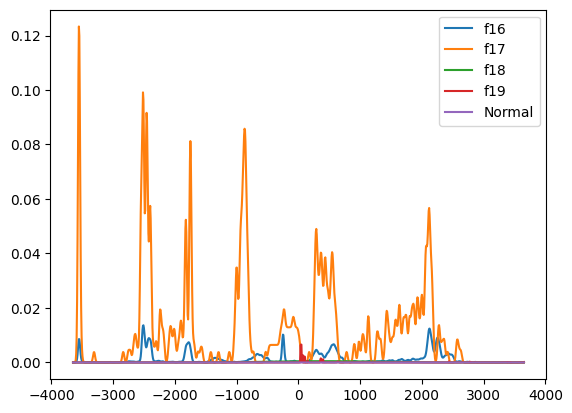

In [9]:
# plot the estimated PDF
plt.plot(x, pdf_f16,label='f16')
plt.plot(x, pdf_f17,label='f17')
plt.plot(x, pdf_f18,label='f18')
plt.plot(x, pdf_f19,label='f19')
plt.plot(x, pdf,label='Normal')
plt.legend()
plt.show()

**Part C**

In [5]:
class BayesianClassifier:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.means = np.array([X[y == c].mean(axis=0) for c in self.classes])
        self.covs = np.array([np.cov(X[y == c].T) + 0.01*np.eye(X.shape[1]) for c in self.classes])
        self.priors = np.array([np.mean(y == c) for c in self.classes])
        
    def predict(self, X):
        probs = [multivariate_normal.pdf(X, mean=m, cov=c) for m, c in zip(self.means, self.covs)]
        likelihood = np.array(probs).T
        evidence = np.sum(likelihood * self.priors, axis=1)
        posterior = likelihood * self.priors / evidence[:, np.newaxis]
        return self.classes[np.argmax(posterior, axis=1)]

    
classifier = BayesianClassifier()
X_train, X_test, y_train, y_test = train_test_split(damadic.values, y, test_size=0.1, random_state=1)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

conf = confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
        

print(conf)
accuracy = np.sum(np.diag(conf)) / np.sum(conf)
precision = np.diag(conf) / np.sum(conf, axis=0)
recall = np.diag(conf) / np.sum(conf, axis=1)
print('Acc= '+str(accuracy)+'\t Precision= '+str(precision)+'\t Recall= '+str(recall))

[[  33    0    0    0    0]
 [   0    3    0    0    0]
 [   0    0   12    0    0]
 [   0    0    0   19    0]
 [  18    2    3   58 8492]]
Acc= 0.990625	 Precision= [0.64705882 0.6        0.8        0.24675325 1.        ]	 Recall= [1.         1.         1.         1.         0.99055173]


C:\Users\user\AppData\Local\Temp\ipykernel_21072\1776744817.py:12: RuntimeWarning: invalid value encountered in divide
  posterior = likelihood * self.priors / evidence[:, np.newaxis]


**Part D**

In [11]:
nor_new_index = class5n_idx[np.random.choice(class5n_idx.shape[0], size=202, replace=False)]
others=np.setdiff1d(np.arange(damadic.shape[0]), np.concatenate([class1f16_idx, class2f17_idx, class3f18_idx, class4f19_idx,nor_new_index]))
nor_new=damadic.values[nor_new_index,:]
x = np.linspace(-1, 87, 1000)

# evaluate the PDF at each point in x
pdf_new = np.zeros_like(x)
for i, xi in enumerate(x):
    pdf_new[i] = np.mean(kde(xi, nor_new))

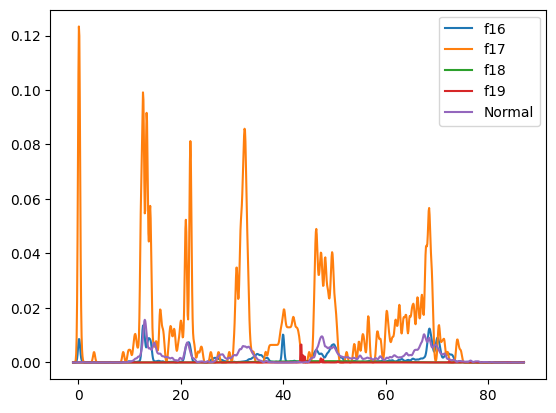

In [12]:
plt.plot(x, pdf_f16,label='f16')
plt.plot(x, pdf_f17,label='f17')
plt.plot(x, pdf_f18,label='f18')
plt.plot(x, pdf_f19,label='f19')
plt.plot(x, pdf_new,label='Normal')
plt.legend()
plt.show()

In [14]:
y_new = np.zeros(damadic.shape[0])
X_new = np.concatenate((f16, f17, f18, f19, nor_new,damadic.values[others]), axis=0)
#y_new = np.zeros((X_new.shape[0],))
y_new[class1f16_idx] = 1
y_new[class2f17_idx] = 2
y_new[class3f18_idx] = 3
y_new[class4f19_idx] = 4
y_new[nor_new_index] = 5
y_new[others]=0


# Convert feature matrices to numpy arrays
f16 = np.array(f16)
f17 = np.array(f17)
f18 = np.array(f18)
f19 = np.array(f19)
nor_new = np.array(nor_new)

# Print shapes of feature matrices and label array
print('f16 shape:', f16.shape)
print('f17 shape:', f17.shape)
print('f18 shape:', f18.shape)
print('f19 shape:', f19.shape)
print('nor_new shape:', nor_new.shape)
print('others_val shape:', damadic.values[others].shape)
print('y_new shape:', y_new.shape)

# Split data into training and testing sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.1, random_state=1)

# Train and evaluate classifier on new dataset
classifier_new = BayesianClassifier()
classifier_new.fit(X_train_new, y_train_new)
y_pred_new = classifier_new.predict(X_test_new)

conf_new = confusion_matrix = metrics.confusion_matrix(y_test_new, y_pred_new)
        

print(conf_new)
accuracy_new = np.sum(np.diag(conf_new)) / np.sum(conf_new)
precision_new = np.diag(conf_new) / np.sum(conf_new, axis=0)
recall_new = np.diag(conf_new) / np.sum(conf_new, axis=1)
print('Acc= '+str(accuracy_new)+'\t Precision= '+str(precision_new)+'\t Recall= '+str(recall_new))

f16 shape: (280, 32)
f17 shape: (36, 32)
f18 shape: (100, 32)
f19 shape: (290, 32)
nor_new shape: (202, 32)
others_val shape: (85491, 32)
y_new shape: (86399,)
[[8328   53   34   20   51   64]
 [   0   33    0    0    0    0]
 [   0    0    3    0    0    0]
 [   0    0    0   12    0    0]
 [   0    0    0    0   19    0]
 [  22    0    0    0    0    1]]
Acc= 0.9717592592592592	 Precision= [0.99736527 0.38372093 0.08108108 0.375      0.27142857 0.01538462]	 Recall= [0.97403509 1.         1.         1.         1.         0.04347826]


C:\Users\user\AppData\Local\Temp\ipykernel_18680\1776744817.py:12: RuntimeWarning: invalid value encountered in divide
  posterior = likelihood * self.priors / evidence[:, np.newaxis]


**Part F**

In [10]:
damadic_9n2001 = pd.read_csv('data/09112001_processed.csv')

testclass1_idx = np.concatenate([np.arange(57275,57550), np.arange(60650,60700), np.arange(60870,60960)])
testclass2_idx = np.concatenate([np.arange(53780,53794), np.arange(54193,54215)])
testclass3_idx = np.concatenate([np.arange(58830,58930), np.arange(58520,58325)])
testclass4_idx = np.concatenate([np.arange(55482,55517), np.arange(55977,56015), np.arange(57030,57072), np.arange(58150,58325)])
testclass5_idx = np.setdiff1d(np.arange(damadic_9n2001.shape[0]), np.concatenate([testclass1_idx,testclass3_idx]))
y_test_9n2001 = np.zeros(damadic_9n2001.shape[0])
y_test_9n2001[testclass1_idx] = 1
y_test_9n2001[testclass2_idx] = 2
y_test_9n2001[testclass3_idx] = 3
y_test_9n2001[testclass4_idx] = 4
y_test_9n2001[testclass5_idx] = 5


#Testing
y_pred_9n2001 = classifier.predict(damadic_9n2001)

conf = confusion_matrix = metrics.confusion_matrix(y_test_9n2001, y_pred_9n2001)
        

print(conf)
accuracy = np.sum(np.diag(conf)) / np.sum(conf)
precision = np.diag(conf) / np.sum(conf, axis=0)
recall = np.diag(conf) / np.sum(conf, axis=1)
print('Acc= '+str(accuracy)+'\t Precision= '+str(precision)+'\t Recall= '+str(recall))


[[  250     0   165]
 [    0     0   100]
 [13862     0 72022]]
Acc= 0.8364911630921654	 Precision= [0.01771542        nan 0.99633406]	 Recall= [0.60240964 0.         0.83859625]


C:\Users\user\AppData\Local\Temp\ipykernel_21072\1776744817.py:12: RuntimeWarning: invalid value encountered in divide
  posterior = likelihood * self.priors / evidence[:, np.newaxis]
C:\Users\user\AppData\Local\Temp\ipykernel_21072\10857031.py:24: RuntimeWarning: invalid value encountered in divide
  precision = np.diag(conf) / np.sum(conf, axis=0)


**Part H**

In [16]:
class EuclideanClassifier:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.means = np.array([X[y == c].mean(axis=0) for c in self.classes])  
        if self.means.ndim == 1:
            self.means = self.means.reshape(1, -1)
        
    def predict(self, X):
        if X.ndim == 1:
            X = X.reshape(1, -1)
        num_features = self.means.shape[1]
        X = X[:, :num_features]  # select only the relevant features
        dist = euclidean_distances(X, self.means)
        return self.classes[np.argmin(dist)]
        
classifier_e = EuclideanClassifier()
X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(damadic.values, y, test_size=0.1, random_state=1)
classifier_e.fit(X_train_e,y_train_e)

# Reshape X_test if necessary
if X_test_e.ndim == 1:
    X_test_e = X_test_e.reshape(1, -1)
if X_test_e.shape[1] != classifier_e.means.shape[1]:
    X_test_e = X_test_e[:, :classifier_e.means.shape[1]]  # select only the relevant features

y_pred_e = classifier_e.predict(X_test_e)


conf_e = np.zeros((5, 5))
for i in range(5):
    for j in range(5):
        conf_e[i, j] = np.sum((y_test == i) & (y_pred == j))
        

print(conf_e)
accuracy_e = np.sum(np.diag(conf_e)) / np.sum(conf_e)
precision_e = np.diag(conf_e) / np.sum(conf_e, axis=0)
recall_e = np.diag(conf_e) / np.sum(conf_e, axis=1)
print('Acc= '+str(accuracy_e)+'\t Precision= '+str(precision_e)+'\t Recall= '+str(recall_e))

IndexError: index 2619 is out of bounds for axis 0 with size 5

In [17]:
class MahalanobisClassifier:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.means = np.array([X[y == c].mean(axis=0) for c in self.classes])
        self.covs = np.array([np.cov(X[y == c].T) for c in self.classes])
        
    def predict(self, X):
        X = X.reshape(1, -1)
        dist = mahalanobis_distances(X, self.means, self.covs)
        return self.classes[np.argmin(dist)]
    
def mahalanobis_distances(X, means, covs):
    dists = []
    for mean, cov in zip(means, covs):
        mean_diff = X - mean
        dist = np.sqrt(mean_diff @ np.linalg.inv(cov) @ mean_diff.T)
        dists.append(dist)
    return np.array(dists).reshape(-1)

classifier_m = MahalanobisClassifier()
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(damadic.values, y, test_size=0.1, random_state=1)
classifier_m.fit(X_train_m,y_train_m)

# Reshape X_test if necessary
if X_test_m.ndim == 1:
    X_test_m = X_test_m.reshape(1, -1)
if X_test_m.shape[1] != classifier_m.means.shape[1]:
    X_test_m = X_test_m[:, :classifier_m.means.shape[1]]  # select only the relevant features

y_pred_m = classifier_m.predict(X_test_m)


conf_m = np.zeros((5, 5))
for i in range(5):
    for j in range(5):
        conf_m[i, j] = np.sum((y_test_m == i) & (y_pred_m == j))
        

print(conf_m)
accuracy_m = np.sum(np.diag(conf_m)) / np.sum(conf_m)
precision_m = np.diag(conf_m) / np.sum(conf_m, axis=0)
recall_m = np.diag(conf_m) / np.sum(conf_m, axis=1)
print('Acc= '+str(accuracy_m)+'\t Precision= '+str(precision_m)+'\t Recall= '+str(recall_m))


ValueError: operands could not be broadcast together with shapes (1,276480) (32,) 